# 1d Data Gen

Data generated and saved to 'data.csv'.


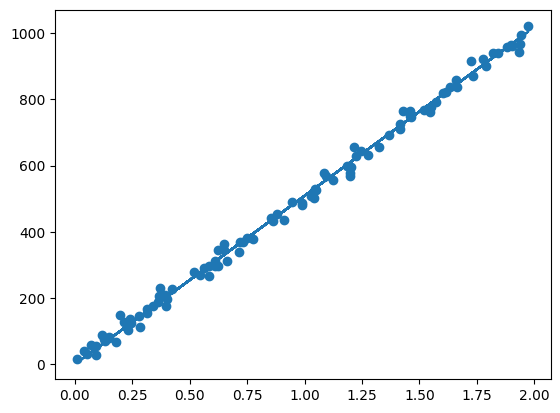

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set a random seed for reproducibility (optional)
np.random.seed(42)

# Number of samples
n_samples = 100

# Generate random x values in some range (e.g., 0 to 2)
X = 2 * np.random.rand(n_samples)

# Generate noise (mean 0, with some standard deviation)
noise = np.random.randn(n_samples) * 20.0  # Adjust 50.0 to control noise level

# True relationship: y = 509*x + noise
y = 509 * X + noise

# Create a Pandas DataFrame
df = pd.DataFrame({
    'x': X,
    'y': y
})

pred = df.x * 509

plt.scatter(df.x, df.y)
plt.plot(df.x,pred)


# Save to CSV
df.to_csv('data_lin_reg.csv', index=False)

print("Data generated and saved to 'data.csv'.")


# Kaggle data
https://www.kaggle.com/datasets/iamsouravbanerjee/house-rent-prediction-dataset/data

BHK: Number of Bedrooms, Hall, Kitchen.

Rent: Rent of the Houses/Apartments/Flats.

Size: Size of the Houses/Apartments/Flats in Square Feet.

Floor: Houses/Apartments/Flats situated in which Floor and Total Number of Floors (Example: Ground out of 2, 3 out of 5, etc.)

Area Type: Size of the Houses/Apartments/Flats calculated on either Super Area or Carpet Area or Build Area.

Area Locality: Locality of the Houses/Apartments/Flats.

City: City where the Houses/Apartments/Flats are Located.

Furnishing Status: Furnishing Status of the Houses/Apartments/Flats, either it is Furnished or Semi-Furnished or Unfurnished.

Tenant Preferred: Type of Tenant Preferred by the Owner or Agent.

Bathroom: Number of Bathrooms.

Point of Contact: Whom should you contact for more information regarding the Houses/Apartments/Flats.

In [7]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("iamsouravbanerjee/house-rent-prediction-dataset")

print("Path to dataset files:", path)

100%|██████████| 82.4k/82.4k [00:00<00:00, 30.9MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/iamsouravbanerjee/house-rent-prediction-dataset/versions/9


In [8]:
import os
import pandas as pd

os.listdir(path)

['House_Rent_Dataset.csv', 'Dataset Glossary.txt']

In [9]:
df = pd.read_csv(os.path.join(path, "House_Rent_Dataset.csv")) # /, \

# Basic EDA

In [4]:
df

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [6]:
assert df.isna().sum().sum() == 0, "Problem"

In [7]:
df.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


In [9]:
df_categ = df.select_dtypes("object")

In [10]:
df_categ.nunique()

,0
Posted On,81
Floor,480
Area Type,3
Area Locality,2235
City,6
Furnishing Status,3
Tenant Preferred,3
Point of Contact,3


In [ ]:
df_categ.Floor.unique()

array(['Ground out of 2', '1 out of 3', '1 out of 2', 'Ground out of 1',
       'Ground out of 4', '1 out of 4', '1 out of 1', 'Ground out of 3',
       '2 out of 3', '4 out of 5', '2 out of 2', '2 out of 5',
       '4 out of 14', '3 out of 3', '5 out of 5', '4 out of 4',
       '7 out of 8', '2 out of 4', '3 out of 4', '1 out of 5',
       '8 out of 5', 'Ground out of 6', '2 out of 1',
       'Upper Basement out of 4', 'Ground out of 5', '3 out of 5',
       '11 out of 19', '5 out of 10', '11 out of 14',
       'Lower Basement out of 2', '2 out of 7', '4 out of 10',
       '7 out of 10', '2 out of 13', '6 out of 7', '4 out of 7',
       '14 out of 14', '43 out of 78', '2 out of 8', '13 out of 18',
       '5 out of 12', '18 out of 24', '3 out of 7', '17 out of 31',
       '11 out of 21', '7 out of 19', '14 out of 23', '9 out of 20',
       'Upper Basement out of 9', '19 out of 24', '3 out of 21',
       '1 out of 22', '8 out of 8', '6 out of 12', '4 out of 58',
       'Upper Basement o

In [10]:
COLS_TO_DROP = ["Area Locality", "Posted On", "Floor"]

df_categ.drop(columns=COLS_TO_DROP, inplace=True)
df.drop(columns=COLS_TO_DROP, inplace=True)


In [12]:
import plotly.express as px

In [13]:
df.value_counts("Area Type")

,count
Area Type,
Super Area,2446
Carpet Area,2298
Built Area,2


In [ ]:
px.bar(df.value_counts("Area Type"))

# Encoding categorical features
https://www.youtube.com/watch?v=589nCGeWG1w

## One Hot Encoding

In [14]:
df.value_counts("City")

,count
City,
Mumbai,972
Chennai,891
Bangalore,886
Hyderabad,868
Delhi,605
Kolkata,524


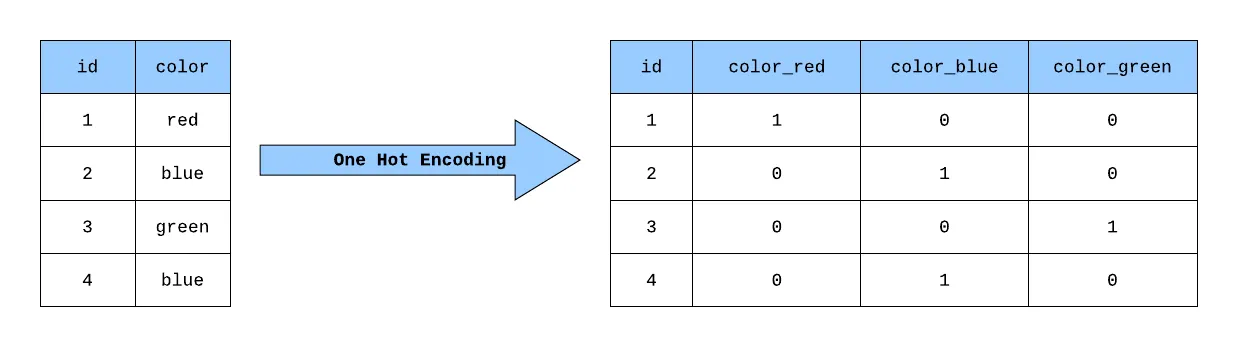

`pip install scikit-learn` or \
`conda install scikit-learn`

NOT SKLEARN

In [11]:
from sklearn.preprocessing import OneHotEncoder

# https://scikit-learn.org/dev/modules/generated/sklearn.preprocessing.OneHotEncoder.html

In [16]:
city = df[["City"]]
city

,City
0,Kolkata
1,Kolkata
2,Kolkata
3,Kolkata
4,Kolkata
...,...
4741,Hyderabad
4742,Hyderabad
4743,Hyderabad
4744,Hyderabad


In [17]:
ohe = OneHotEncoder(sparse_output=False)

ohe.fit(city)

OneHotEncoder(sparse_output=False)

In [18]:
city_transformed = ohe.transform(city)

In [19]:
city_transformed

array([[0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.]])

In [20]:
pd.DataFrame(city_transformed)

,0,1,2,3,4,5
0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...
4741,0.0,0.0,0.0,1.0,0.0,0.0
4742,0.0,0.0,0.0,1.0,0.0,0.0
4743,0.0,0.0,0.0,1.0,0.0,0.0
4744,0.0,0.0,0.0,1.0,0.0,0.0


In [21]:
ohe.get_feature_names_out()

array(['City_Bangalore', 'City_Chennai', 'City_Delhi', 'City_Hyderabad',
       'City_Kolkata', 'City_Mumbai'], dtype=object)

In [22]:
encoded_city = pd.DataFrame(city_transformed, columns=ohe.get_feature_names_out())
encoded_city

,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai
0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...
4741,0.0,0.0,0.0,1.0,0.0,0.0
4742,0.0,0.0,0.0,1.0,0.0,0.0
4743,0.0,0.0,0.0,1.0,0.0,0.0
4744,0.0,0.0,0.0,1.0,0.0,0.0


In [24]:
pd.concat([df, encoded_city], axis=1)

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai
0,2,10000,1100,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,0.0,0.0,0.0,0.0,1.0,0.0
1,2,20000,800,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,0.0,0.0,0.0,0.0,1.0,0.0
2,2,17000,1000,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,0.0,0.0,0.0,0.0,1.0,0.0
3,2,10000,800,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,0.0,0.0,0.0,0.0,1.0,0.0
4,2,7500,850,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2,15000,1000,Carpet Area,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner,0.0,0.0,0.0,1.0,0.0,0.0
4742,3,29000,2000,Super Area,Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner,0.0,0.0,0.0,1.0,0.0,0.0
4743,3,35000,1750,Carpet Area,Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent,0.0,0.0,0.0,1.0,0.0,0.0
4744,3,45000,1500,Carpet Area,Hyderabad,Semi-Furnished,Family,2,Contact Agent,0.0,0.0,0.0,1.0,0.0,0.0


### Problem with OHE

In [ ]:
encoded_city

,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai
0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...
4741,0.0,0.0,0.0,1.0,0.0,0.0
4742,0.0,0.0,0.0,1.0,0.0,0.0
4743,0.0,0.0,0.0,1.0,0.0,0.0
4744,0.0,0.0,0.0,1.0,0.0,0.0


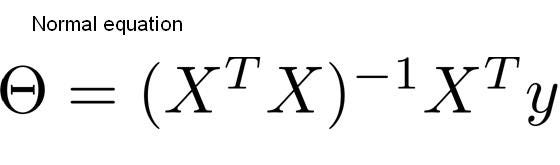

In [35]:
encoded_city.iloc[:, :-1]

,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata
0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
4741,0.0,0.0,0.0,1.0,0.0
4742,0.0,0.0,0.0,1.0,0.0
4743,0.0,0.0,0.0,1.0,0.0
4744,0.0,0.0,0.0,1.0,0.0


In [38]:
1 - encoded_city.iloc[:, :-1].sum(axis=1)

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
4741,0.0
4742,0.0
4743,0.0
4744,0.0


In [29]:
sum_of_rest = encoded_city.iloc[:, :-1].sum(axis=1)

In [30]:
res = 1 - sum_of_rest

In [31]:
encoded_city.iloc[:, -1] == res

,0
0,True
1,True
2,True
3,True
4,True
...,...
4741,True
4742,True
4743,True
4744,True


In [32]:
all(encoded_city.iloc[:, -1] == res)

True

In [12]:
import numpy as np

In [40]:
X_X_t = encoded_city @ encoded_city.T

In [41]:
np.linalg.inv(X_X_t)

LinAlgError: Singular matrix

In [42]:
np.linalg.det(X_X_t)

0.0

#### Removing duplicates

In [44]:
df.duplicated()

260

In [45]:
np.any(df.duplicated())

True

In [48]:
df = df[~df.duplicated()]

### Solution

In [49]:
ohe = OneHotEncoder(sparse_output=False, drop="first")

encoded_city_fixed = ohe.fit_transform(city)


In [50]:
pd.DataFrame(encoded_city_fixed, columns=ohe.get_feature_names_out())

,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...
4741,0.0,0.0,1.0,0.0,0.0
4742,0.0,0.0,1.0,0.0,0.0
4743,0.0,0.0,1.0,0.0,0.0
4744,0.0,0.0,1.0,0.0,0.0


### OHE with Pandas

In [51]:
pd.get_dummies(city)

,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai
0,False,False,False,False,True,False
1,False,False,False,False,True,False
2,False,False,False,False,True,False
3,False,False,False,False,True,False
4,False,False,False,False,True,False
...,...,...,...,...,...,...
4741,False,False,False,True,False,False
4742,False,False,False,True,False,False
4743,False,False,False,True,False,False
4744,False,False,False,True,False,False


In [52]:
pd.get_dummies(city, drop_first=True)

,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai
0,False,False,False,True,False
1,False,False,False,True,False
2,False,False,False,True,False
3,False,False,False,True,False
4,False,False,False,True,False
...,...,...,...,...,...
4741,False,False,True,False,False
4742,False,False,True,False,False
4743,False,False,True,False,False
4744,False,False,True,False,False


## LabelEncoding

In [53]:
furnish = df["Furnishing Status"]

In [54]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

furnish_le = le.fit_transform(furnish)
furnish_le

array([2, 1, 1, ..., 1, 1, 2])

In [56]:
df["Furnish_le"] = furnish_le

df

<ipython-input-56-99f913320aa2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Furnish_le"] = furnish_le


,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Furnish_le
0,2,10000,1100,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,2
1,2,20000,800,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1
2,2,17000,1000,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1
3,2,10000,800,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,2
4,2,7500,850,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner,2
...,...,...,...,...,...,...,...,...,...,...
4741,2,15000,1000,Carpet Area,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner,1
4742,3,29000,2000,Super Area,Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner,1
4743,3,35000,1750,Carpet Area,Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent,1
4744,3,45000,1500,Carpet Area,Hyderabad,Semi-Furnished,Family,2,Contact Agent,1


In [57]:
df.drop_duplicates("Furnishing Status")

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Furnish_le
0,2,10000,1100,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,2
1,2,20000,800,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1
12,1,6500,250,Carpet Area,Kolkata,Furnished,Bachelors,1,Contact Owner,0


In [58]:
df.value_counts("Area Type")

,count
Area Type,
Super Area,2250
Carpet Area,2234
Built Area,2


In [59]:
area_type_le = le.fit_transform(df["Area Type"])


In [60]:
df["area_type_le"] = area_type_le

<ipython-input-60-1c59e890a590>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["area_type_le"] = area_type_le


In [61]:
df.drop_duplicates("Area Type")

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Furnish_le,area_type_le
0,2,10000,1100,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,2,2
4,2,7500,850,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner,2,1
3079,2,15000,1000,Built Area,Chennai,Furnished,Bachelors/Family,2,Contact Owner,0,0


### Problem with LE
Super Area - Built Area	= 2 * Carpet Area





## Solution - Ordinal Encoding

In [62]:
mappings = {
    "Unfurnished": 0,
    "Semi-Furnished": 0.5,
    "Furnished": 1
}

df["Furnishing OE"] = df["Furnishing Status"].map(mappings)

<ipython-input-62-b5bbc633b78e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Furnishing OE"] = df["Furnishing Status"].map(mappings)


In [ ]:
df

## Target Encoding (BE CAREFULL!!!)

https://www.youtube.com/watch?v=589nCGeWG1w

In [63]:
df["Point of Contact"].value_counts()

,count
Point of Contact,
Contact Owner,3001
Contact Agent,1484
Contact Builder,1


In [64]:
df.groupby("Point of Contact")["Rent"].mean()

,Rent
Point of Contact,
Contact Agent,73941.841644
Contact Builder,5500.000000
Contact Owner,17074.851050


`pip install category_encoders`
https://contrib.scikit-learn.org/category_encoders/

In [65]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 81.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.0
    Uninstalling scikit-learn-1.6.0:
      Successfully uninstalled scikit-learn-1.6.0


In [66]:
!pip uninstall -y scikit-learn
!pip install scikit-learn==1.5.2

Found existing installation: scikit-learn 1.5.2
Uninstalling scikit-learn-1.5.2:
  Successfully uninstalled scikit-learn-1.5.2
  Using cached scikit_learn-1.5.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (13 kB)
Using cached scikit_learn-1.5.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.3 MB)


In [67]:
!pip install category_encoders==2.5.0


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 2.1 MB/s eta 0:00:00
  Attempting uninstall: category_encoders
    Found existing installation: category_encoders 2.7.0
    Uninstalling category_encoders-2.7.0:
      Successfully uninstalled category_encoders-2.7.0


In [68]:
import category_encoders as ce

col = "Point of Contact"

target_enc = ce.TargetEncoder(cols=[col])

target_enc.fit(df[col], df['Rent'])

df['Point_of_Coutact_encoded'] = target_enc.transform(df[col])


/usr/local/lib/python3.11/dist-packages/category_encoders/target_encoder.py:92: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter min_samples_leaf will change in version 2.6."
/usr/local/lib/python3.11/dist-packages/category_encoders/target_encoder.py:97: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter smoothing will change in version 2.6."
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:411: FutureWarning: The `_get_tags` method is deprecated in 1.6 and will be removed in 1.7. Please implement the `__sklearn_tags__` method.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The TargetEncoder or classes from which it inherits use `_get_tags` and `_more_tags`. Please def

AttributeError: 'super' object has no attribute '__sklearn_tags__'

In [ ]:
df

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Point_of_Coutact_encoded
0,2,10000,1100,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,16704.206468
1,2,20000,800,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,16704.206468
2,2,17000,1000,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,16704.206468
3,2,10000,800,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,16704.206468
4,2,7500,850,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner,16704.206468
...,...,...,...,...,...,...,...,...,...,...
4741,2,15000,1000,Carpet Area,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner,16704.206468
4742,3,29000,2000,Super Area,Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner,16704.206468
4743,3,35000,1750,Carpet Area,Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent,73481.158927
4744,3,45000,1500,Carpet Area,Hyderabad,Semi-Furnished,Family,2,Contact Agent,73481.158927


In [71]:
df.groupby("Point of Contact")["Rent"].mean()

,Rent
Furnishing Status,
Furnished,1.000000
Semi-Furnished,0.704518
Unfurnished,0.412892


## Some preprocessing

In [72]:
df["Area Type"].value_counts()

,count
Area Type,
Super Area,2250
Carpet Area,2234
Built Area,2


In [73]:
df = df[df["Area Type"] != "Built Area"]

df["Area Type"].value_counts()

,count
Area Type,
Super Area,2250
Carpet Area,2234


In [74]:
df["Point of Contact"].value_counts()

,count
Point of Contact,
Contact Owner,2999
Contact Agent,1484
Contact Builder,1


In [75]:
df = df[df["Point of Contact"] != "Contact Builder"]

## Putting all together

In [76]:
df.drop(columns=["Point_of_Coutact_encoded"], inplace=True)

KeyError: "['Point_of_Coutact_encoded'] not found in axis"

In [13]:
COLS_OHE = ["Area Type", "City", "Tenant Preferred", \
            "Point of Contact"]


In [14]:
data_OHE = pd.get_dummies(df[COLS_OHE], drop_first=True)

In [15]:
df = pd.concat([df, data_OHE], axis=1)

In [16]:
df.drop(columns=COLS_OHE, inplace=True)

In [17]:
mappings = {
    "Unfurnished": 0,
    "Semi-Furnished": 0.5,
    "Furnished": 1
}
df["Furnishing Status"] = df["Furnishing Status"].map(mappings)

In [18]:
df

,BHK,Rent,Size,Furnishing Status,Bathroom,Area Type_Carpet Area,Area Type_Super Area,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family,Point of Contact_Contact Builder,Point of Contact_Contact Owner
0,2,10000,1100,0.0,2,False,True,False,False,False,True,False,True,False,False,True
1,2,20000,800,0.5,1,False,True,False,False,False,True,False,True,False,False,True
2,2,17000,1000,0.5,1,False,True,False,False,False,True,False,True,False,False,True
3,2,10000,800,0.0,1,False,True,False,False,False,True,False,True,False,False,True
4,2,7500,850,0.0,1,True,False,False,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2,15000,1000,0.5,2,True,False,False,False,True,False,False,True,False,False,True
4742,3,29000,2000,0.5,3,False,True,False,False,True,False,False,True,False,False,True
4743,3,35000,1750,0.5,3,True,False,False,False,True,False,False,True,False,False,False
4744,3,45000,1500,0.5,2,True,False,False,False,True,False,False,False,True,False,False


# Linear Regression with Scikit-learn

In [19]:
X = df
y = df["Rent"]

In [20]:
X.head(1)

,BHK,Rent,Size,Furnishing Status,Bathroom,Area Type_Carpet Area,Area Type_Super Area,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family,Point of Contact_Contact Builder,Point of Contact_Contact Owner
0,2,10000,1100,0.0,2,False,True,False,False,False,True,False,True,False,False,True


In [21]:
y.head(1)

,Rent
0,10000


In [22]:
from sklearn.linear_model import LinearRegression


In [23]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [25]:
print("Intercept:", model.intercept_)
print("Coefficient(s):", model.coef_)

coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

coef_df

Intercept: 2.9103830456733704e-11
Coefficient(s): [-1.59736905e-11  1.00000000e+00 -1.33226763e-15 -5.37712743e-13
 -8.71553840e-14 -1.32917540e-12 -8.75892454e-13 -2.59493163e-13
 -9.93051806e-13  4.25346410e-14  4.03296676e-13 -2.94210234e-12
 -3.54889613e-13  1.22808113e-13 -6.99493863e-13  7.92161670e-14]


,Feature,Coefficient
0,BHK,-1.597369e-11
1,Rent,1.000000e+00
2,Size,-1.332268e-15
3,Furnishing Status,-5.377127e-13
4,Bathroom,-8.715538e-14
5,Area Type_Carpet Area,-1.329175e-12
6,Area Type_Super Area,-8.758925e-13
7,City_Chennai,-2.594932e-13
8,City_Delhi,-9.930518e-13
9,City_Hyderabad,4.253464e-14


In [26]:
pd.options.display.float_format = '{:.6f}'.format


In [27]:
coef_df

,Feature,Coefficient
0,BHK,-0.000000
1,Rent,1.000000
2,Size,-0.000000
3,Furnishing Status,-0.000000
4,Bathroom,-0.000000
5,Area Type_Carpet Area,-0.000000
6,Area Type_Super Area,-0.000000
7,City_Chennai,-0.000000
8,City_Delhi,-0.000000
9,City_Hyderabad,0.000000


### Fixing issue

In [28]:
X = df.drop(columns=["Rent"])
y = df["Rent"]

model = LinearRegression()
model.fit(X, y)

print("Intercept:", model.intercept_)
print("Coefficient(s):", model.coef_)

coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

coef_df

Intercept: -23525.355324434197
Coefficient(s): [ 2.75306044e+03  3.97499321e+01  5.85817451e+03  1.04188529e+04
 -8.44140430e+03 -1.17496026e+04 -6.26479460e+03  9.06134713e+03
 -1.51504253e+04 -7.93147156e+02  5.22837687e+04  8.74811737e+02
 -8.61664757e+03  2.59786853e+04 -8.64125280e+03]


,Feature,Coefficient
0,BHK,2753.060442
1,Size,39.749932
2,Furnishing Status,5858.174510
3,Bathroom,10418.852928
4,Area Type_Carpet Area,-8441.404298
5,Area Type_Super Area,-11749.602625
6,City_Chennai,-6264.794604
7,City_Delhi,9061.347126
8,City_Hyderabad,-15150.425323
9,City_Kolkata,-793.147156


### 21 Jan

### Interpreting coefficents

**Note**
- In practice, we would first of all evaluate our model, and only then try to interpret it.

$y_{initial} = \theta_0 + \theta_1 * x_1 + \theta_2 * x_2$

Increase $x_1$ by 1

$y_{new} = \theta_0 + \theta_1 * (x_1 + 1) + \theta_2 * x_2 = \theta_0 + \theta_1 * x_1 + \theta_2 * x_2 + \theta_1$

$y_{new} - y_{initial} = \theta_1$

In [ ]:
coef_df.sort_values("Coefficient", ascending=False)


,Feature,Coefficient
9,City_Mumbai,52284.922401
3,Bathroom,10422.920197
6,City_Delhi,9062.435104
2,Furnishing Status,5893.968850
0,BHK,2756.472437
10,Tenant Preferred_Bachelors/Family,871.459736
1,Size,39.747316
8,City_Kolkata,-786.167994
4,Area Type_Super Area,-3305.866241
5,City_Chennai,-6241.411479


**Size = 39.747316**
- For each additional square meter (or whichever unit “Size” represents), the rent on average increases by about 39.75 units of currency, holding other factors constant. (c. p)

**City_Hyderabad = -15172.606293**
- Being in Hyderabad (vs. baseline) on average leads to a 15172.61 decrease in predicted rent on average c. p.

**Note**
- Ceteris paribus (a Latin phrase, meaning "other things equal"))


**Important**: We should not just sort the values, but rather sort them based on their absolute value

In [ ]:
coef_df.sort_values("Coefficient", key=abs, ascending=False)


,Feature,Coefficient
9,City_Mumbai,52284.922401
7,City_Hyderabad,-15172.606293
3,Bathroom,10422.920197
6,City_Delhi,9062.435104
12,Point of Contact_Contact Owner,-8635.527851
11,Tenant Preferred_Family,-8621.901443
5,City_Chennai,-6241.411479
2,Furnishing Status,5893.968850
4,Area Type_Super Area,-3305.866241
0,BHK,2756.472437


Why is size so not important, it does not make any sense

In [ ]:
df[["Size", "Bathroom"]].describe()

,Size,Bathroom
count,4743.000000,4743.000000
mean,967.702087,1.966266
std,634.312842,0.884589
min,10.000000,1.000000
25%,550.000000,1.000000
50%,850.000000,2.000000
75%,1200.000000,2.000000
max,8000.000000,10.000000


# Feature Scaling

In [ ]:
px.histogram(df, ["Size", "Bathroom"])

## Min Max Scaling

In [ ]:
px.histogram(df, "Size")

In [ ]:
def min_max_scale(df, col):
    return (df[col] - df[col].min()) / (df[col].max() - df[col].min())

df["Size_min_max"] = min_max_scale(df, "Size")
df["Bathroom_min_max"] = min_max_scale(df, "Bathroom")

px.histogram(df, ["Size_min_max", "Bathroom_min_max"])


In [ ]:

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(df[['Size', 'Bathroom']])

scaled_data = scaler.transform(df[['Size', 'Bathroom']])

df[['Size_minmax', 'Bathroom_minmax']] = scaled_data

df.iloc[:,-4:]

,Size_min_max,Bathroom_min_max,Size_minmax,Bathroom_minmax
0,0.136421,0.111111,0.136421,0.111111
1,0.098874,0.000000,0.098874,0.000000
2,0.123905,0.000000,0.123905,0.000000
3,0.098874,0.000000,0.098874,0.000000
4,0.105131,0.000000,0.105131,0.000000
...,...,...,...,...
4741,0.123905,0.111111,0.123905,0.111111
4742,0.249061,0.222222,0.249061,0.222222
4743,0.217772,0.222222,0.217772,0.222222
4744,0.186483,0.111111,0.186483,0.111111


## Standard Scaling

In [ ]:
def standard_scale(df, col):
    """
    Standardize a single column to have mean 0 and std dev 1:
         z = (x - mean) / std
    """
    return (df[col] - df[col].mean()) / df[col].std()

df["Size_std_manual"] = standard_scale(df, "Size")
df["Bathroom_std_manual"] = standard_scale(df, "Bathroom")


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(df[['Size', 'Bathroom']])

scaled_data = scaler.transform(df[['Size', 'Bathroom']])

df[['Size_standard', 'Bathroom_standard']] = scaled_data

df.iloc[:, -4:]


,Size_standard,Bathroom_standard,Size_std_manual,Bathroom_std_manual
0,0.208591,0.038139,0.208569,0.038135
1,-0.264412,-1.092449,-0.264384,-1.092334
2,0.050923,-1.092449,0.050918,-1.092334
3,-0.264412,-1.092449,-0.264384,-1.092334
4,-0.185578,-1.092449,-0.185558,-1.092334
...,...,...,...,...
4741,0.050923,0.038139,0.050918,0.038135
4742,1.627599,1.168727,1.627427,1.168604
4743,1.233430,1.168727,1.233300,1.168604
4744,0.839261,0.038139,0.839173,0.038135


In [ ]:
px.histogram(df, ["Size_std_manual", "Bathroom_std_manual"])

# Train Test Split

In [1]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


import plotly.express as px
import plotly.graph_objects as go


In [6]:
np.random.seed(509)

num_samples = 100
theta_0_true = 4
theta_1_true = 3


X = np.random.rand(num_samples, 1)
y = theta_0_true + theta_1_true * X
df = pd.DataFrame({'x': X.flatten(), 'y': y.flatten()})
df

,x,y
0,0.755873,6.267619
1,0.250878,4.752635
2,0.705838,6.117513
3,0.377670,5.133011
4,0.722901,6.168702
...,...,...
95,0.384609,5.153826
96,0.804502,6.413507
97,0.626121,5.878364
98,0.838703,6.516109


In [7]:
px.scatter(df, "x", "y")

### SETTING THE SEED IS IMPORTANT

#### Adding noise

In [14]:
X = np.random.rand(200, 1)
y = theta_0_true + theta_1_true * X + np.random.randn(200, 1) / 5
df = pd.DataFrame({'x': X.flatten(), 'y': y.flatten()})

In [15]:
x_vals = np.linspace(0, 1, 100)
y_vals = theta_0_true + theta_1_true * x_vals

fig = px.scatter(df, "x", "y")

fig.add_trace(go.Scatter(x=x_vals, y=y_vals, mode='lines', name='True Line'))

fig.show()



#### First work with a few points

In [17]:
df_small = df.sort_values("x").head(3)
df_small

,x,y
3,0.005613,4.081056
110,0.009609,3.996003
98,0.011265,4.220366


In [24]:
# show fig but xlim to 0.012
fig.update_layout(xaxis=dict(range=[0.004, 0.012]), yaxis=dict(range=[3.8, 4.4]))
fig.show()

In [ ]:
X = df_small[["x"]]
y = df_small["y"]

#### 10th degree polynomial

In [31]:
from sklearn.preprocessing import PolynomialFeatures

# Polynomial regression
poly = PolynomialFeatures(degree=10)
X_poly = poly.fit_transform(X)
model_poly = LinearRegression()
model_poly.fit(X_poly, y)

# Predictions for polynomial regression
x_vals_poly = poly.transform(x_vals)
y_pred_poly = model_poly.predict(x_vals_poly)

# Linear regression
model_line = LinearRegression()
model_line.fit(X, y)

# Predictions for linear regression
y_pred_line = model_line.predict(x_vals)

# Plotting
fig = px.scatter(df_small, "x", "y", title="Actual Data, True Line, Line Fit, and Poly Fit")
fig.add_trace(go.Scatter(x=x_vals.flatten(), y=theta_0_true + theta_1_true * x_vals.flatten(), mode='lines', name='True Line'))
fig.add_trace(go.Scatter(x=x_vals.flatten(), y=y_pred_poly.flatten(), mode='lines', name='Poly Fit'))
fig.add_trace(go.Scatter(x=x_vals.flatten(), y=y_pred_line.flatten(), mode='lines', name='Line Fit'))
fig.show()


c:\Users\hayk_\.conda\envs\100\lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but PolynomialFeatures was fitted with feature names

c:\Users\hayk_\.conda\envs\100\lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



In [37]:
X_all = df[["x"]]
y_all = df["y"]

# predict the models on all data
y_pred_line_all = model_line.predict(X_all)
y_pred_poly_all = model_poly.predict(poly.transform(X_all))

# plot the predictions
fig = px.scatter(df, "x", "y", title="Actual Data, Line Fit, Poly Fit")
fig.add_trace(go.Scatter(x=df["x"], y=y_pred_line_all.flatten(), mode='markers', name='Line Fit'))
fig.add_trace(go.Scatter(x=df["x"], y=y_pred_poly_all.flatten(), mode='markers', name='Poly Fit'))
fig.add_trace(go.Scatter(x=x_vals.flatten(), y=theta_0_true + theta_1_true * x_vals.flatten(), mode='lines', name='True Line'))

fig.show()


#### Errors

In [40]:
small_line_mse = mean_squared_error(y, model_line.predict(X))
small_poly_mse = mean_squared_error(y, model_poly.predict(poly.transform(X)))

all_line_mse = mean_squared_error(y_all, model_line.predict(X_all))
all_poly_mse = mean_squared_error(y_all, model_poly.predict(poly.transform(X_all)))

print(f"Small Data MSE - Line: {small_line_mse:.5f}")
print(f"Small Data MSE - Poly: {small_poly_mse:.5f}")
print()
print(f"All Data MSE - Line: {all_line_mse:.5f}")
print(f"All Data MSE - Poly: {all_poly_mse:.5f}")

Small Data MSE - Line: 0.00708
Small Data MSE - Poly: 0.00000

All Data MSE - Line: 55.13088
All Data MSE - Poly: 143995635.79848


### Solution - split the data

In [60]:
num_samples = 30

X = np.random.rand(num_samples, 1)
y = theta_0_true + theta_1_true * X + np.random.randn(num_samples, 1) / 3

df = pd.DataFrame({'x': X.flatten(), 'y': y.flatten()})

X = df[["x"]]
y = df["y"]
px.scatter(df, "x", "y")


In [61]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=509)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((24, 1), (6, 1), (24,), (6,))

In [67]:
# Linear regression
model_line = LinearRegression()
model_line.fit(X_train, y_train)

y_train_pred_line = model_line.predict(X_train)
y_test_pred_line = model_line.predict(X_test)

# Polynomial regression
model_poly = LinearRegression()
poly = PolynomialFeatures(degree=40)
poly.fit(X_train)

model_poly.fit(poly.transform(X_train), y_train)

y_train_pred_poly = model_poly.predict(poly.transform(X_train))

y_test_pred_poly = model_poly.predict(poly.transform(X_test))

#### Just a line

In [68]:
print("Train MSE - Line:", mean_squared_error(y_train, y_train_pred_line))
print("Test MSE - Line:", mean_squared_error(y_test, y_test_pred_line))
print()
print("Train MSE - Poly:", mean_squared_error(y_train, y_train_pred_poly))
print("Test MSE - Poly:", mean_squared_error(y_test, y_test_pred_poly))

import plotly.express as px

# Bar plots for Train and Test MSE
mse_data = {
    'Data': ['Train', 'Test'],
    'Line': [mean_squared_error(y_train, y_train_pred_line), mean_squared_error(y_test, y_test_pred_line)],
    'Poly': [mean_squared_error(y_train, y_train_pred_poly), mean_squared_error(y_test, y_test_pred_poly)]
}

mse_df = pd.DataFrame(mse_data)

fig = px.bar(mse_df, x='Data', y=['Line', 'Poly'], barmode='group', title='Train and Test MSE for Line and Poly Models')
fig.update_layout(yaxis_title='Mean Squared Error')
fig.show()

Train MSE - Line: 0.10411743752431528
Test MSE - Line: 0.17534742664697503

Train MSE - Poly: 0.002076735082115823
Test MSE - Poly: 783697037477.6561


In [69]:
# Sort the dataframe by 'x' values
df_sorted = df.sort_values(by='x')

# Extrapolate model to predict the entire range of x values
y_pred_line = model_line.predict(df_sorted[['x']])
y_pred_poly = model_poly.predict(poly.transform(df_sorted[['x']]))

fig = px.scatter(df_sorted, "x", "y", title="Actual Data, Line Fit, Poly Fit")
fig.add_trace(go.Scatter(x=df_sorted["x"], y=y_pred_line.flatten(), mode='lines', name='Line Fit'))
fig.add_trace(go.Scatter(x=df_sorted["x"], y=y_pred_poly.flatten(), mode='lines', name='Poly Fit'))
fig.add_trace(go.Scatter(x=x_vals.flatten(), y=theta_0_true + theta_1_true * x_vals.flatten(), mode='lines', name='True Line'))

fig.show()


In [71]:
fig.update_layout(xaxis=dict(range=[X.min(), X.max()]), 
                  yaxis=dict(range=[y.min(), y.max()]))

# Underfitting and Overfitting

Underfitting:
- Շարքային Սողոմոնյան - https://www.youtube.com/watch?v=pv_4MVcjEik
Overfitting:
- Եթե կլոր ա ուրեմն մեջինը քառակուսի ա - https://www.youtube.com/watch?v=7arnxebkEUU 



## Examples

### Overfitting: Astrological Predictions in Ancient Civilizations**
**Historical Backdrop:**
From Babylonian times onward, countless astrologers meticulously charted the positions of celestial bodies, connecting them with floods, famines, victories in war, and the births of royals.

**Why it’s Overfitting:**
- Ancient astrologers often looked at every tiny “coincidence” between a planetary alignment and historical events, building extremely specific rules. (E.g., “When Mars is in Taurus and the moon is half full, there will be a great harvest if the newborn prince is left-handed!”)
- These detailed “models” fit prior observations too well, often capturing noise and coincidences rather than robust truths.

**Moral of the Story:** 
Squeezing meaning out of every alignment of the stars is like overfitting on random noise in a dataset!

### Underfitting: “Bleeding” as a Medieval Medical Treatment
**Historical Backdrop:**
For centuries, a common medical practice in Europe was bloodletting—draining blood to “rebalance the humors” and cure ailments from headaches to fevers.

**Why it’s Underfitting:**
- The medical “model” at the time was extremely simplistic: “Something’s wrong? Let’s remove blood.”
- They applied the same one-size-fits-all approach to all sorts of diseases, ignoring the huge variability between different medical conditions (and patients).
- Because the underlying theory was so rudimentary (the four humors concept), the “model” rarely fit the real complexity of physiology.
**Moral of the Story:**
 When your theory is too general and ignores most of the nuanced details, you’re underfitting the complexity of reality (and might end up making people worse).

### Overfitting: Your Uncle’s Hyper-Specific Sports Superstitions
**Everyday Fun Example:**
Maybe you have an uncle who insists on wearing the exact same (unwashed) socks during every big game, needs to place the remote exactly 5 inches from the TV, and can only eat “lucky peanuts” if the score is tied.

**Why it’s Overfitting:**
- He’s discovered a string of coincidences: whenever he did those specific rituals, his team happened to win.
- He’s latched onto every tiny detail—like someone building an overly complex machine-learning model that memorizes all the noise in the training data.
- The moment “new data” arrives—i.e., the team loses despite the lucky peanuts—his model is proven to have no real predictive power.

**Moral of the Story:** 
If your “model” requires that many hyper-specific conditions to “succeed,” it’s probably not robust!

## Demo

In [80]:
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# ------------------------------------------------------------------------------
# 1. Generate Synthetic Data (True degree = 3)
# ------------------------------------------------------------------------------
np.random.seed(509)
poly_degree = 20

# True polynomial function (3rd degree)
def true_function(x):
    # Example: y = 1 + 2x + 3x^2 + 4x^3, plus random noise
    return 1 + 2*x + 3*x**2 + 4*x**3 + np.random.normal(0, 20, size=x.shape)

def true_function_without_noise(x):
    return 1 + 2*x + 3*x**2 + 4*x**3

# Generate data
N = 100
X = np.linspace(-3, 3, N).reshape(-1, 1)
y = true_function(X.ravel())

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=42)

# ------------------------------------------------------------------------------
# 2. Fit Polynomial Models of Degree 1 to 10 & Record MSE
# ------------------------------------------------------------------------------
degrees = range(1, poly_degree)
train_mses = []
test_mses = []
polynomial_predictions = {}  # Store predictions for plotting

# A dense grid for plotting model predictions
X_plot = np.linspace(X.min(), X.max(), 200).reshape(-1, 1)

for d in degrees:
    # Create polynomial features
    poly = PolynomialFeatures(degree=d)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly  = poly.transform(X_test)
    X_plot_poly  = poly.transform(X_plot)
    
    # Fit linear regression on polynomial features
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    # Predict on train and test
    y_train_pred = model.predict(X_train_poly)
    y_test_pred  = model.predict(X_test_poly)
    
    # Calculate MSE
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse  = mean_squared_error(y_test,  y_test_pred)
    
    train_mses.append(train_mse)
    test_mses.append(test_mse)
    
    # Store predictions for the plotting slider
    y_plot_pred = model.predict(X_plot_poly)
    polynomial_predictions[d] = y_plot_pred

# ------------------------------------------------------------------------------
# 3. Plot MSE vs. Polynomial Degree (Line Chart)
# ------------------------------------------------------------------------------
df_mse = {
    'Degree': list(degrees),
    'Train MSE': train_mses,
    'Test MSE': test_mses
}

fig_mse = px.line(
    df_mse, 
    x='Degree', 
    y=['Train MSE', 'Test MSE'], 
    markers=True,
    title="Train & Test MSE vs. Polynomial Degree"
)
fig_mse.update_layout(
    xaxis = dict(dtick=1),
    yaxis_title="MSE"
)

# ------------------------------------------------------------------------------
# 4. Interactive Plot: Data + Fitted Polynomials (Slider)
# ------------------------------------------------------------------------------
# We'll create a figure with:
#   - Scatter of the training data
#   - Scatter of the test data (optional, or we can mark them differently)
#   - A line that updates for each polynomial degree using frames.

# Base scatter (training data)
scatter_train = go.Scatter(
    x=X_train.ravel(), 
    y=y_train, 
    mode='markers',
    name='Train Data',
    marker=dict(color='blue', size=6)
)

# Optionally, scatter for test data
scatter_test = go.Scatter(
    x=X_test.ravel(), 
    y=y_test, 
    mode='markers',
    name='Test Data',
    marker=dict(color='red', size=6)
)

# We'll build frames for each polynomial degree
frames = []
for d in degrees:
    # Create a line trace for the polynomial prediction at degree d
    line_pred = go.Scatter(
        x=X_plot.ravel(),
        y=polynomial_predictions[d],
        mode='lines',
        line=dict(width=3),
        name=f"Degree {d} fit"
    )
    frames.append(
        go.Frame(
            data=[scatter_train, scatter_test, line_pred],
            name=str(d)
        )
    )

# Initial line (degree=1 by default)
init_line = go.Scatter(
    x=X_plot.ravel(),
    y=polynomial_predictions[1],
    mode='lines',
    line=dict(width=3),
    name=f"Degree 1 fit"
)

# Build the figure with the first frame's data
fig_poly = go.Figure(
    data=[scatter_train, scatter_test, init_line],
    layout=go.Layout(
        title="Polynomial Fits (Degree Slider)",
        xaxis=dict(title="X"),
        yaxis=dict(title="y"),
        updatemenus=[  # Slider button settings
            dict(
                type="buttons",
                showactive=False,
                x=1.15,
                y=1.15,
                xanchor="right",
                yanchor="top",
                buttons=[
                    dict(label="Play",
                         method="animate",
                         args=[None, 
                               dict(frame=dict(duration=500, redraw=True),
                                    fromcurrent=True,
                                    transition=dict(duration=300)
                                   )
                              ]
                        )
                ]
            )
        ],
        # We'll define sliders next
        sliders=[{
            'currentvalue': {'prefix': 'Degree: ', 'xanchor': 'right'},
            'steps': [
                {
                    'label': str(d),
                    'method': 'animate',
                    'args': [[str(d)], 
                             dict(mode='immediate',
                                  frame=dict(duration=300, redraw=True),
                                  transition=dict(duration=300))]
                }
                for d in degrees
            ]
        }]
    ),
    frames=frames
)

# add the true function to fig_poly
true_y = true_function_without_noise(X_plot.ravel())
fig_poly.add_trace(go.Scatter(x=X_plot.ravel(), y=true_y, mode='lines', name='True Function'))




# ------------------------------------------------------------------------------
# 5. Show the plots
# ------------------------------------------------------------------------------
fig_poly.show()
fig_mse.show()
